# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

The basic idea of building a tree is starting with a population and splitting the data into groups with the goal of the instances in those final, narrowed-down groups being the most similar to eachother. At each level of the tree it is determined True or False whether an instance has a certain feature or a certain value of numerical variable and this creates a split.

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

Trees split the data based on certain "cutoffs" for each variable so there is no assumed shape of the correlation between certain variables. Each variable determines the best split at each level of the tree, so the more important aspect is the threshold used for the cutoff rather than just the overall variable itself.

3. Why is the Gini a good loss function for categorical target variables?

Our goal is to create groups that are as pure (extremely different) as possible and the Gini measures that level of purity. Gini impurity is measured by computing x(1-x) for each group created by each threshold, and sum over each cutoff group. The split with the lowest Gini impurity is the best split. It is a good loss function because it helps to pick the best split.

4. Why do trees tend to overfit, and how can this tendency be constrained?

Trees have a tendency to overfit because they can keep splitting until each terminal node of the tree has too few or even just 1 overly specific sample. This would show that the tree has overfit to the data. One way to constrain this tendency would be to limit the depth of the tree before it gets to the point of overfitting. Other options include putting a lower bound on impurity so that terminal nodes don't get too pure, or put a limit on how few cases can appear in a terminal node.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

Although it is good to have lots of categorical variables for this type of model, I would say this statement is false because trees can perform well for regression as well. One could definitely choose valuable thresholds for numerical values which can perform well when doing splits.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

Having only two branch options for a split makes it simpler to keep track of how splits occur, how good the split is, and overall is easier to interpret the results.

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

A tree is probably overfitting if terminal nodes have very small amounts or even just 1 in the sample size. If computed impurity values of groups are high and the tree is very shallow it may be underfitting.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2.1 load the cars data as raw github link
link = 'https://raw.githubusercontent.com/kpunsalan8/trees-KP/refs/heads/main/assignment/data/cars_hw.csv'
df = pd.read_csv(link)

In [4]:
# how many observations are in the data
len(df)

# how many features/covariates/variables are in the data
len(df.columns)

# what are the available variables
df.columns

Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')

In [5]:
# peek at first few rows
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [7]:
# 2.2 make categorical vars dummy
# create one hot encoded var of Make, Color, Body_type, No_of_Owners, Fuel_Type, Transmission, and Transmission_Type
df = pd.get_dummies(df, columns=['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type'])

In [8]:
df.head()

,Unnamed: 0,Make_Year,Mileage_Run,Seating_Capacity,Price,Make_Chevrolet,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,...,Fuel_Type_diesel,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_4-Speed,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Automatic,Transmission_Type_Manual
0,1,2017,44611,5,657000,False,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False
1,2,2016,20305,5,682000,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
2,3,2019,29540,5,793000,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
3,4,2017,35680,5,414000,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
4,5,2017,25126,5,515000,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True


In [10]:
# train test split
# target is Price
from sklearn.model_selection import train_test_split

features = df.drop(columns=['Price', 'Unnamed: 0'])
target = df['Price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [11]:
# 2.3 From sklearn.tree, import the DecisionTreeRegressor and plot_tree
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [12]:
# iterate over possible values for min_samples_leaf
# computing the  𝑅2  for each value between 1 and 25
# Source: this loop was partially colab AI suggested
for i in range(1, 26):
    regressor = DecisionTreeRegressor(min_samples_leaf=i)
    regressor.fit(X_train, y_train)
    score = regressor.score(X_test, y_test)
    print(f"min_samples_leaf: {i}, R2: {score}")

min_samples_leaf: 1, R2: 0.8288797523202829
min_samples_leaf: 2, R2: 0.8136008024215808
min_samples_leaf: 3, R2: 0.7895242666610476
min_samples_leaf: 4, R2: 0.8008277535293127
min_samples_leaf: 5, R2: 0.813937365378755
min_samples_leaf: 6, R2: 0.805850801160521
min_samples_leaf: 7, R2: 0.7968199796300152
min_samples_leaf: 8, R2: 0.8002995874576164
min_samples_leaf: 9, R2: 0.7926992159481326
min_samples_leaf: 10, R2: 0.7930374982037196
min_samples_leaf: 11, R2: 0.7971409528735578
min_samples_leaf: 12, R2: 0.7822561983677742
min_samples_leaf: 13, R2: 0.7830934804803342
min_samples_leaf: 14, R2: 0.7770575742281992
min_samples_leaf: 15, R2: 0.7806307526177868
min_samples_leaf: 16, R2: 0.7709886341099872
min_samples_leaf: 17, R2: 0.772462470976059
min_samples_leaf: 18, R2: 0.7706093685726004
min_samples_leaf: 19, R2: 0.7498528142434848
min_samples_leaf: 20, R2: 0.7495510835456863
min_samples_leaf: 21, R2: 0.7505023025109951
min_samples_leaf: 22, R2: 0.7502189629127393
min_samples_leaf: 23, 

**What choice achieves the highest  𝑅2  on the test data?** A min_samples_leaf value of 1

In [23]:
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
# 2.4 regress price on the rest of the features/covariates using a regression tree
reg_tree = DecisionTreeRegressor(min_samples_leaf=1) # value of 1 from Q3
reg_tree.fit(X_train, y_train)
y_pred_tree = reg_tree.predict(X_test)

In [29]:
# What is your  𝑅2  and RMSE on the test set?
score = r2_score(y_test, y_pred_tree)
print(f"R2: {score}")
rmse_score = mean_squared_error(y_test, y_pred_tree)
print(f"RMSE: {rmse_score}")

R2: 0.814708687285989
RMSE: 21252076530.612244


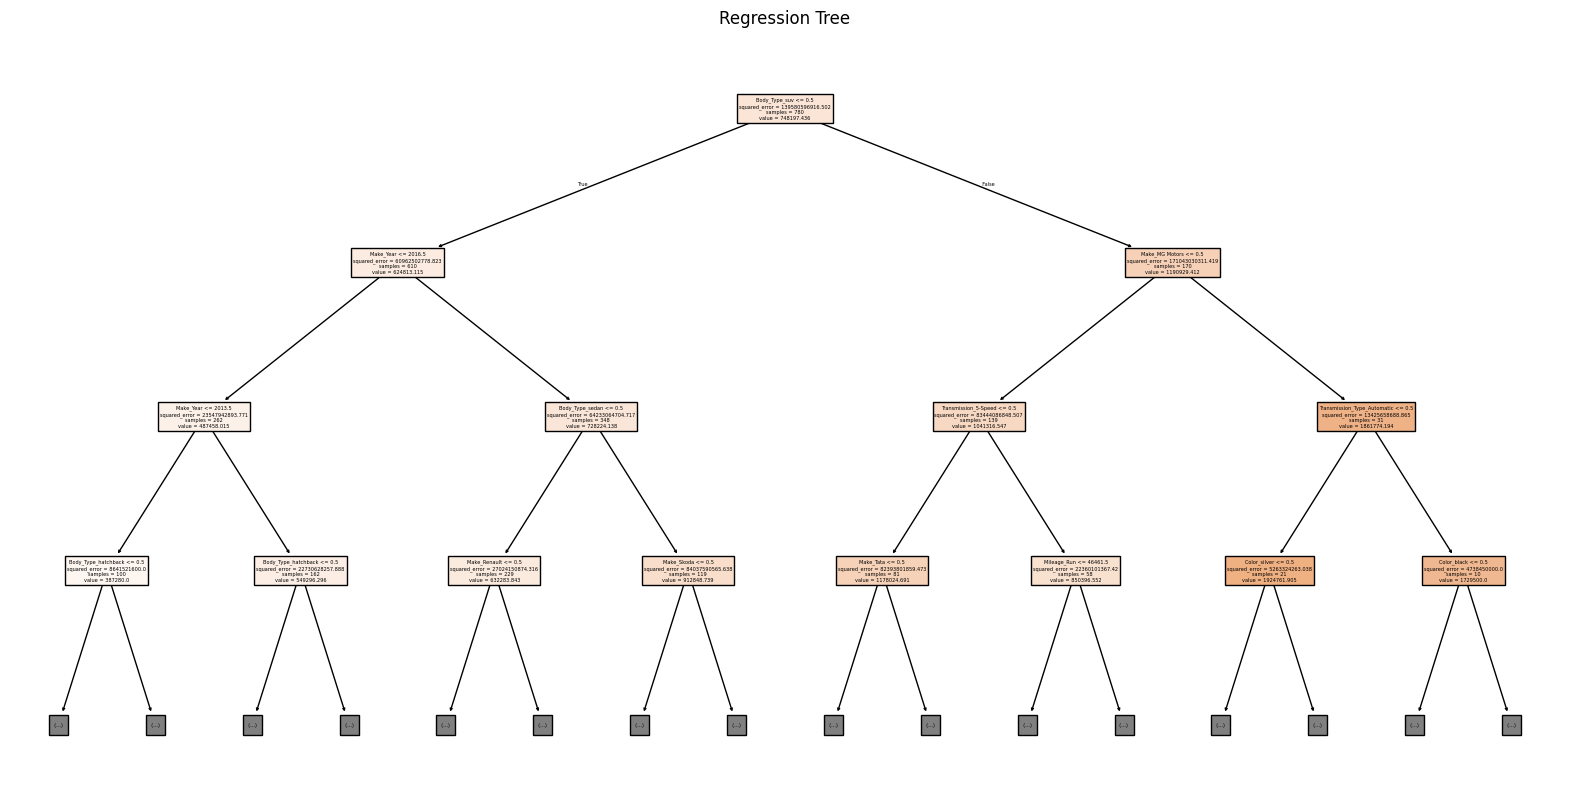

In [38]:
# Plot the dendrogram of the regression tree
var_names = reg_tree.feature_names_in_
plt.figure(figsize=(20, 10))
plot_tree(reg_tree,filled=True,feature_names=var_names, max_depth=3) # limit depth for plot
plt.title("Regression Tree")
plt.show()

Text(0, 0.5, 'Residuals')

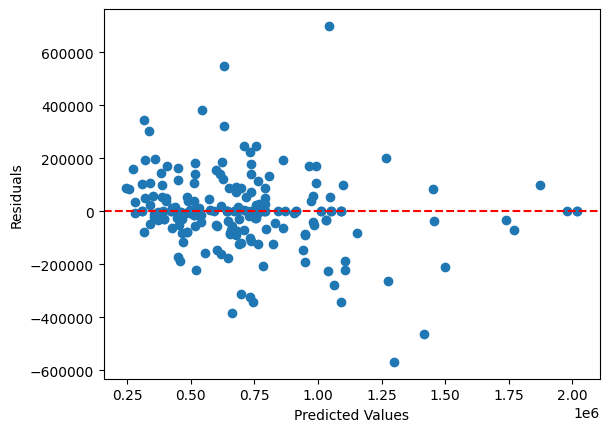

In [39]:
# Plot the residuals
residuals = y_test - y_pred_tree
plt.scatter(y_pred_tree, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

**Is the density of residuals symmetric and centered around 0?**

In [ ]:
# 2.5 Run a linear regression of price on the same variables

**Which model -- regression tree or linear regression -- performs better on the test set? Why?**

In [ ]:
# 2.6 Predict prices using both your tree and your linear model
# make a scatter plot of their values

**Describe what you see.**

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?